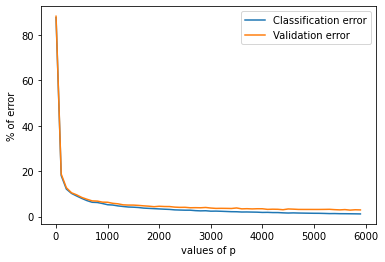

In [ ]:
#Problem 5 
#sub problem c
# Name: Karthick Subramanian
# ASUID: 1223408524

import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import math

d = 784
clas = 10

(X_train, labels_train), (X_test, labels_test) = mnist.load_data()
#mndata = MNIST(r'/content/train-images-idx3-ubyte.gz')
#X_train, labels_train = map(np.array, mndata.load_training())
#X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

# Training function
def train(X,y,lambd,p):
  X_Trans = np.transpose(X)
  I = np.identity(p)
  w = []
  Inv = np.linalg.solve(np.dot(X_Trans,X) + lambd*I, I)
  X_t_y = np.dot(X_Trans,y)
  w_cap = np.dot(Inv,X_t_y)
  return w_cap

#One hot encoding function
def one_hot_encode(y,cla):
  ohe = np.zeros((y.shape[0],cla))
  for i,ys in enumerate(y):
    ohe[i][ys] = 1
  return ohe

# Predict function
def predict(W,x_prime):
  w_Trans = np.transpose(W)
  a,b = np.shape(x_prime)
  result = []
  for i in range(a):
    x_i_prime = x_prime[i]
    x_i_prime = np.transpose(x_i_prime)
    result.append(np.argmax(np.dot(w_Trans,x_i_prime)))

  return result




#Error Function
def Error(pred, X, labels):
  a,b = np.shape(X)
  Error = 0
  for i in range(a):
    if labels[i] != pred[i]:
      Error = Error + 1
  return Error / a

x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, labels_train,test_size=0.2, shuffle='True')
p = 6000
P = []
final_error = []
final_test_error = []

#Looping through p to get error for each value of p
# To reduce computational load, the step size is taken as 100
for i in range(1,p,100):
  G = np.random.normal(0,0.1,size=(i,d))
  G = np.transpose(G)
  b = np.random.uniform(0, 2*math.pi,size=i)
  b = np.transpose(b)

  # Training 
  h = np.cos(np.dot(x_train_cv,G) + b)
  y_train_encode = one_hot_encode(y_train_cv, clas)
  W = train(h,y_train_encode,0.0001,i)
  final_error.append(Error(predict(W,h), h, y_train_cv) * 100)

  P.append(i)

  #Testing
  h_dash = np.cos(np.dot(x_test_cv,G) + b)
  y_test_encode = one_hot_encode(y_test_cv, clas)
  final_test_error.append(Error(predict(W,h_dash), h_dash, y_test_cv) * 100)

plt.plot(P,final_error, label = "Classification error")
plt.plot(P,final_test_error, label = "Validation error")
plt.xlabel("values of p")
plt.ylabel("% of error")
plt.legend()
plt.show()









